<a href="https://colab.research.google.com/github/2303A51142/ShadowFox/blob/main/Task%20Level%20(Intermediate).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Store Sales and Profit Analysis using Python
Problem Statement: Analyzing the sales and profit performance of a
retail store is a crucial task for businesses aiming to optimize
operations, refine pricing strategies, enhance marketing efforts, and
improve inventory management. This challenge requires leveraging
data-driven insights to identify areas for improvement and drive
revenue and growth. If you aspire to learn how to conduct a
comprehensive analysis of store sales and profits, this article
provides a guide. The task involves delving into the intricacies of
storing data, employing Python for analysis, and deriving actionable
insights for strategic decision-making.

First 5 rows of the dataset:
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Cat

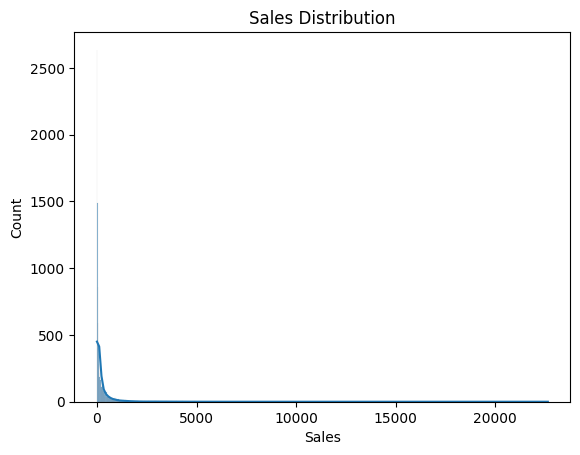

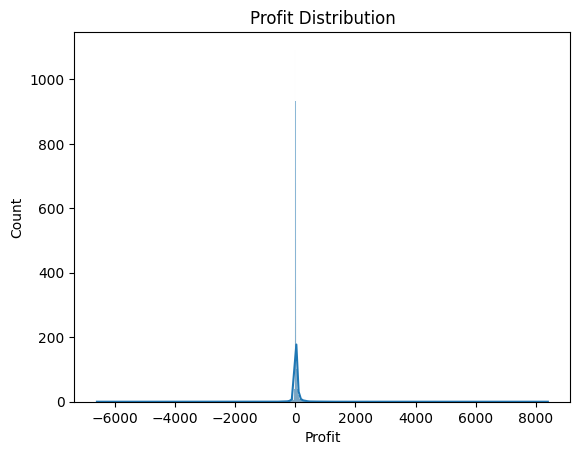

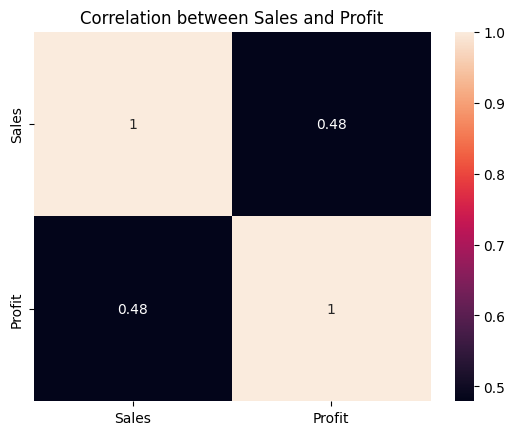


Total Sales: 2297200.8603000003
Total Profit: 286397.0217

Average Profit Margin: 0.12031392972104459

Sales by Region:
Region
Central    501239.8908
East       678781.2400
South      391721.9050
West       725457.8245
Name: Sales, dtype: float64


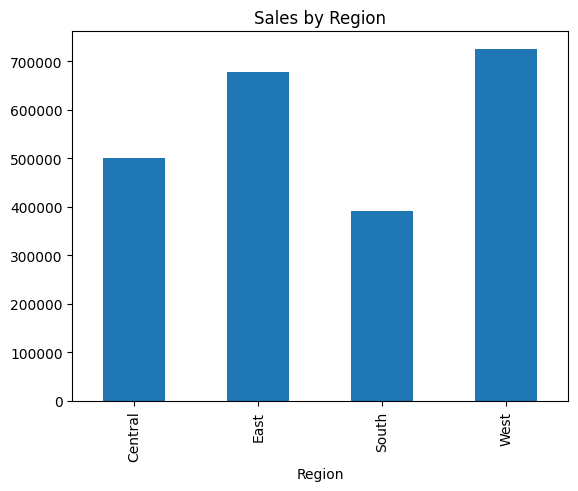

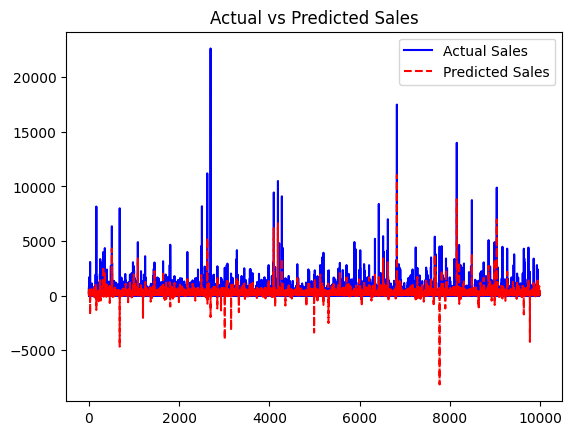


Model Coefficients:
Intercept: -21.639018033198624
Coefficients: [231.73990717  47.06024734   1.28975366]


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
df = pd.read_csv('/content/Superstore.csv', encoding='latin-1')
print("First 5 rows of the dataset:")
print(df.head())
print("\nMissing values in each column:")
print(df.isnull().sum())
df.fillna(0, inplace=True)
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
print("\nSummary statistics:")
print(df.describe())
sns.histplot(df['Sales'], kde=True)
plt.title('Sales Distribution')
plt.show()
sns.histplot(df['Profit'], kde=True)
plt.title('Profit Distribution')
plt.show()
correlation = df[['Sales', 'Profit']].corr()
sns.heatmap(correlation, annot=True)
plt.title('Correlation between Sales and Profit')
plt.show()
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
print(f'\nTotal Sales: {total_sales}')
print(f'Total Profit: {total_profit}')
df['Profit Margin'] = df['Profit'] / df['Sales']
print(f'\nAverage Profit Margin: {df["Profit Margin"].mean()}')
sales_by_region = df.groupby('Region')['Sales'].sum()
print("\nSales by Region:")
print(sales_by_region)
sales_by_region.plot(kind='bar', title='Sales by Region')
plt.show()
if 'Date' in df.columns:
    df.set_index('Date', inplace=True)
    df['Sales'].resample('M').sum().plot(title='Monthly Sales Trend')
    plt.show()
X = df[['Discount', 'Quantity', 'Profit']]
y = df['Sales']
model = LinearRegression()
model.fit(X, y)
predicted_sales = model.predict(X)
plt.plot(y.values, label='Actual Sales', color='blue')
plt.plot(predicted_sales, label='Predicted Sales', color='red', linestyle='--')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()
print("\nModel Coefficients:")
print(f'Intercept: {model.intercept_}')
print(f'Coefficients: {model.coef_}')


2.Your task is to develop an ML model for car selling price
prediction and analysis. The deployed system will provide users with
an approximate selling price for their cars based on several features,
including fuel type, years of service, showroom price, number of
previous owners, kilometers driven, whether the seller is a dealer or
an individual, and transmission type (manual/automatic).


<ipython-input-23-00701032c516>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)


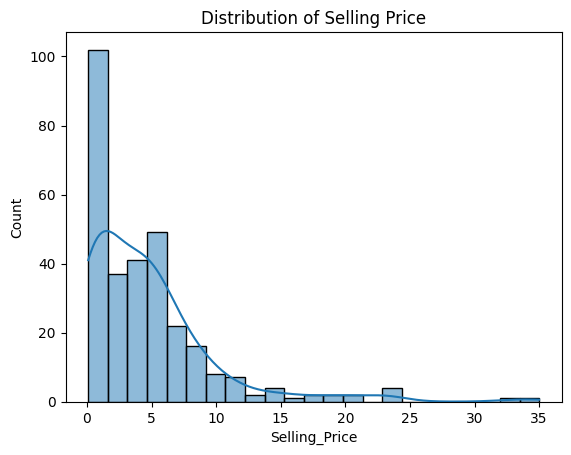

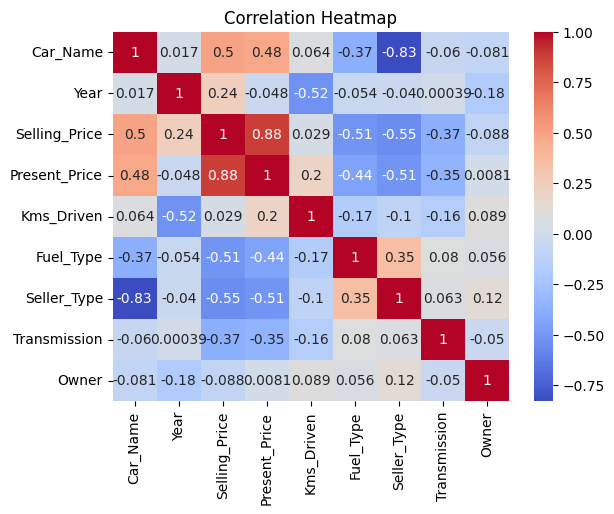

Mean Squared Error (MSE): 0.7522196018032787
Root Mean Squared Error (RMSE): 0.8673059447526453
R-squared: 0.9673453217069136

Feature Importances:
               Importance
Present_Price    0.867366
Year             0.061745
Kms_Driven       0.028955
Car_Name         0.028312
Transmission     0.009160
Seller_Type      0.001783
Fuel_Type        0.001349
Owner            0.001329


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import drive
file_path = '/content/car.csv'
df = pd.read_csv(file_path)
for column in df.select_dtypes(include=np.number).columns:
    df[column].fillna(df[column].median(), inplace=True)
label_encoder = LabelEncoder()
for column in ['Fuel_Type', 'Transmission', 'Seller_Type', 'Car_Name']: # Include 'Car_Name' for encoding
    if column in df.columns:  # Check if the column exists in the DataFrame
        df[column] = label_encoder.fit_transform(df[column])
sns.histplot(df['Selling_Price'], kde=True)
plt.title('Distribution of Selling Price')
plt.show()
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared: {r2}')
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index=X.columns,
                                   columns=['Importance']).sort_values('Importance', ascending=False)
print("\nFeature Importances:")
print(feature_importances)

3.Loan Approval Prediction with Machine Learning using Python
Problem Statement: Loan Approval Prediction poses a critical
challenge in the fintech sector, necessitating the application of
Machine Learning to analyze credit history data and construct
intelligent systems capable of making informed decisions about loan
approvals. This problem involves delving into various factors such as
the applicant's financial history, income, credit rating, employment
status, and other pertinent attributes.


<ipython-input-30-b23d382f8530>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)


Accuracy: 0.7723577235772358

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.42      0.56        43
           1       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123


Confusion Matrix:
[[18 25]
 [ 3 77]]

Feature Importances:
                   Importance
Credit_History       0.259682
ApplicantIncome      0.191776
LoanAmount           0.173558
CoapplicantIncome    0.108843
Dependents           0.055607
Property_Area        0.053189
Loan_Amount_Term     0.048118
Gender               0.031345
Self_Employed        0.030200
Married              0.025536
Education            0.022146


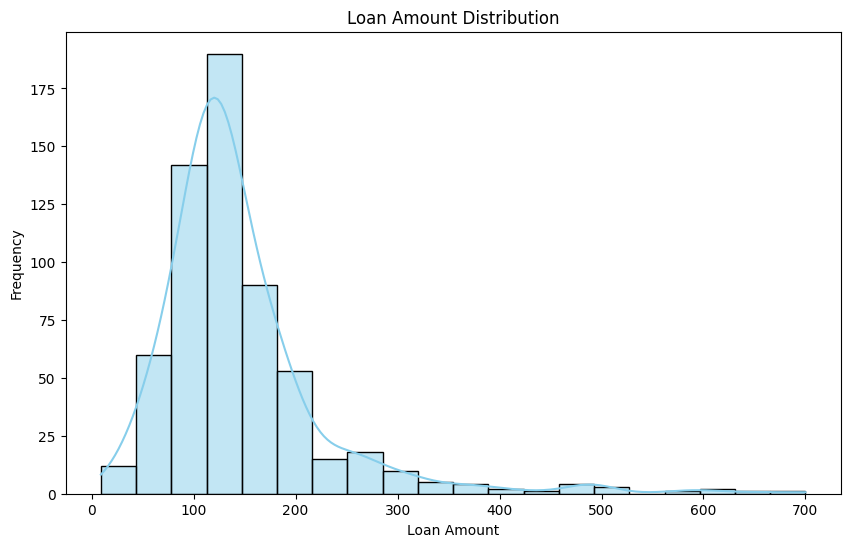

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
file_path = '/content/loan_prediction.csv'
df = pd.read_csv(file_path)
for column in df.select_dtypes(include=np.number).columns:
    df[column].fillna(df[column].median(), inplace=True)
label_encoder = LabelEncoder()
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for col in categorical_cols:
    if col in df.columns:
        df[col] = label_encoder.fit_transform(df[col].astype(str))
X = df.drop(['Loan_Status', 'Loan_ID'], axis=1)
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index=X.columns,
                                   columns=['Importance']).sort_values('Importance', ascending=False)
print("\nFeature Importances:")
print(feature_importances)
plt.figure(figsize=(10, 6))
sns.histplot(df['LoanAmount'], kde=True, bins=20, color='skyblue')
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()
if 'Interest_Rate' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Interest_Rate'], kde=True, bins=20, color='salmon')
    plt.title('Interest Rate Distribution')
    plt.xlabel('Interest Rate')
    plt.ylabel('Frequency')
    plt.show()
if 'AmountPaid' in df.columns:
    df['PendingLoanAmount'] = df['LoanAmount'] - df['AmountPaid']
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Loan_Status', y='PendingLoanAmount', data=df, estimator=np.mean)
    plt.title('Average Pending Loan Amount by Loan Status')
    plt.xlabel('Loan Status (0: No, 1: Yes)')
    plt.ylabel('Average Pending Loan Amount')
    plt.show()
